In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
infile = open('faces.csv','r')
img_data = infile.read().strip().split('\n')
img = [map(int,a.strip().split(',')) for a in img_data]
pixels = []
for p in img:
    pixels += p
faces = np.reshape(pixels,(400,4096))
# print(faces)

In [3]:
image_count = 0

In [4]:
def normalize(U):
    return U / LA.norm(U)

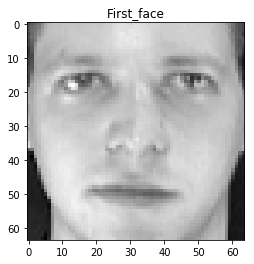

In [5]:
first_face = np.reshape(faces[0],(64,64),order='F')
image_count+=1
plt.figure(image_count)
plt.title('First_face')
plt.imshow(first_face,cmap=plt.cm.gray)

Face Number 366


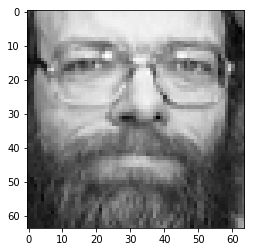

In [6]:
rand = np.random.randint(0, 399)
rface = np.reshape(faces[rand], (64, 64), order = 'F')
plt.imshow(rface, cmap=plt.cm.gray)
print("Face Number " + str(rand))

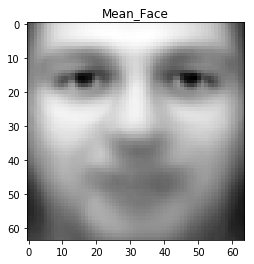

In [58]:
meanface = np.mean(faces, axis=0)
meanfacep = np.reshape(meanface,(64,64),order='F')

plt.title('Mean_Face')
plt.imshow(meanfacep,cmap=plt.cm.gray)

In [7]:
centeredfaces = faces - meanface

[96.8325 98.34   99.8825 ... 73.2575 74.8    75.13  ]


In [60]:
#Find Eigenvalues and Eigenvectors
A = np.matrix(centeredfaces)
L = A*A.transpose()
eigvals, eigvecs = LA.eig(L)
argsorted = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[argsorted]
eigvecs_sorted = eigvecs[:,argsorted]

temp = []

for i in range(len(eigvecs_sorted)):
    temp.append(A.transpose()*eigvecs_sorted[:,i])
    
for i in range(len(temp)):
    temp[i] = normalize(temp[i])

zj = np.matrix(np.array(temp))
U = zj.transpose()

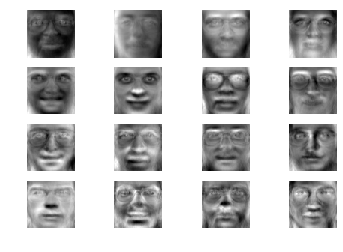

In [11]:
#Display First 16 Principle Components
eigfaces = np.array(U)
eigfaces = np.reshape(eigfaces,(64,64,400), order='F')

plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(eigfaces[:,:,i], cmap=plt.cm.gray)
    plt.axis('off')


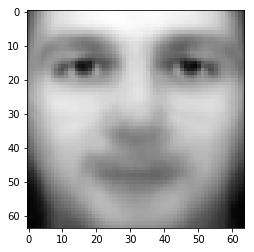

In [63]:
def reconstruct(pcs, uf):
    omega = (np.matrix(U[:,:pcs]).transpose())*(np.matrix(A[uf,:]).transpose())
    display = (np.matrix(U[:,:pcs])*np.matrix(omega)) + meanface.reshape(4096, 1)

    ling = np.reshape(display,(64,64),order='F')
    plt.imshow(ling,cmap=plt.cm.gray)

reconstruct(2, 0)


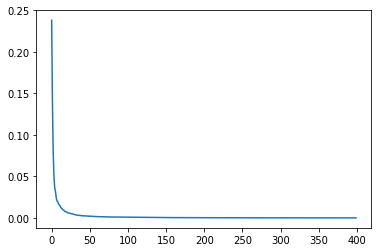

In [66]:
# Plot proportion of variance of all the PCs
yuh = []
sum = 0
for v in eigvals_sorted:
    sum += v
for v in eigvals_sorted:
    yuh.append(v/sum)
plt.plot(yuh)